In [1]:
pip install spacy

  Using cached spacy-3.2.4-cp38-cp38-win_amd64.whl (11.6 MB)
  Using cached preshed-3.0.6-cp38-cp38-win_amd64.whl (113 kB)
  Using cached cymem-2.0.6-cp38-cp38-win_amd64.whl (36 kB)
  Using cached click-8.0.4-py3-none-any.whl (97 kB)
  Using cached typer-0.4.1-py3-none-any.whl (27 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached blis-0.7.7-cp38-cp38-win_amd64.whl (6.6 MB)
  Using cached srsly-2.4.3-cp38-cp38-win_amd64.whl (448 kB)
  Using cached spacy_legacy-3.0.9-py2.py3-none-any.whl (20 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached wasabi-0.9.1-py3-none-any.whl (26 kB)
  Using cached spacy_loggers-1.0.2-py3-none-any.whl (7.2 kB)
  Using cached numpy-1.22.3-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached Jinja2-3.1.1-py3-none-any.whl (132 kB)
  Using cached thinc-8.0.15-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached murmurhash-1.0.6-cp38-cp38-win_amd64.whl (21 kB)
  Using cach

In [2]:
pip install pandas

  Using cached pandas-1.4.2-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nbformat

  Using cached nbformat-5.3.0-py3-none-any.whl (73 kB)
  Using cached fastjsonschema-2.15.3-py3-none-any.whl (22 kB)
  Using cached jsonschema-4.4.0-py3-none-any.whl (72 kB)
  Using cached pyrsistent-0.18.1-cp38-cp38-win_amd64.whl (61 kB)
  Using cached importlib_resources-5.7.1-py3-none-any.whl (28 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Using cached zipp-3.8.0-py3-none-any.whl (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
#This is the basic imports required to run this code.
import numpy as np
from numpy import NaN
import pandas as pd
import spacy 
# from Preprocessing import PreTextCleaner for preprocessing of the data
%run Preprocessing.ipynb import PreTextCleaner
#from Analysis import Aspect to get the hyponyms of seed words
%run Analysis.ipynb import Aspect

from spacy import displacy

nlp = spacy.load("en_core_web_sm")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Run config file
%run config.ipynb
# Reading config file
import configparser
config = configparser.ConfigParser()
config.read("config.ini")

['config.ini']

In [13]:
l = []
import codecs
#This is to read the input data file and perform the preprocessing on it
sentences = codecs.open(config['Data']['data'], "r", "utf-8")
for i in sentences:
    l.append(i)
# print(l)
    
z_test_sample=l
text = []
#These actions will be passed to the Preprocessing.ipynb
action = {'lower_case' : eval(config['Preprocessing']['lower_case']),
        'remove_numeric': eval(config['Preprocessing']['remove_numeric']),
        'numeric_to_word': eval(config['Preprocessing']['numeric_to_word']),
        'remove_sentence_split_delimeters': eval(config['Preprocessing']['remove_sentence_split_delimeters']),
        'remove_text_in_brackets': eval(config['Preprocessing']['remove_text_in_brackets']),
        'remove_links': eval(config['Preprocessing']['remove_links']),
        'negation_handling': eval(config['Preprocessing']['negation_handling']),
        'remove_puntuation': eval(config['Preprocessing']['remove_puntuation']),
        'remove_whitespace': eval(config['Preprocessing']['remove_whitespace']),
        'lemmatization' : eval(config['Preprocessing']['lemmatization'])}

text_cleaner = PreTextCleaner(action)
# print(text_cleaner)
for i in range(len(z_test_sample)):
    text.append(text_cleaner.clean(z_test_sample[i]))

In [14]:
#This is what text will looks like i.e each review will be added to the list
print(text)

['wow loved this place', 'crust is not good', 'not tasty and the texture was just nasty', 'stopped by during the late may bank holiday off rick steve recommendation and loved it', 'the selection on the menu was great and so were the prices', 'now i am getting angry and i want my damn pho', 'honeslty it did not taste that fresh', 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer', 'the fries were great too', 'a great touch', 'service was very prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced', 'i tried the cape cod ravoli chicken with cranberrymmmm', 'i was disgusted because i was pretty sure that was human hair', 'i was shocked because no signs indicate cash only', 'highly recommended', 'waitress was a little slow in service', 'this place is not worth your time let alone vegas', 'did not like at all', 'the burrittos blah', 'the food amazing', 'se

In [15]:
#This will give the list of postive and negative words, which will further be used to detect the polarity of the review.
p = []
n = []
import codecs
pos = codecs.open(config['Data']['positive_words'])
neg = codecs.open(config['Data']['negative_words'])
for i in pos:
    p.append(i)
for i in neg:
    n.append(i)

p_test_sample = p
n_test_sample = n
text1 = []
text2 = []
action = {'lower_case' : eval(config['PositiveNegative']['lower_case']),
        'remove_numeric': eval(config['PositiveNegative']['remove_numeric']),
        'numeric_to_word': eval(config['PositiveNegative']['numeric_to_word']),
        'remove_sentence_split_delimeters': eval(config['PositiveNegative']['remove_sentence_split_delimeters']),
        'remove_text_in_brackets': eval(config['PositiveNegative']['remove_text_in_brackets']),
        'remove_links': eval(config['PositiveNegative']['remove_links']),
        'negation_handling': eval(config['PositiveNegative']['negation_handling']),
        'remove_puntuation': eval(config['PositiveNegative']['remove_puntuation']),
        'remove_whitespace': eval(config['PositiveNegative']['remove_whitespace']),
        'lemmatization' : eval(config['PositiveNegative']['lemmatization'])}
text_cleaner_words = PreTextCleaner(action)
for i in range(len(p_test_sample)):
    text1.append(text_cleaner_words.clean(p_test_sample[i]))
for i in range(len(n_test_sample)):
    text2.append(text_cleaner_words.clean(n_test_sample[i]))

In [16]:
#This is what text1 will looks like i.e each positive word will be added to the list. 
#Similarly, for text2 which will contain list of negative words
print(text1)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [17]:
#This is to get the list of positive and negative words, which will be there in the given input data file.
positive_words = []
negative_words = []
def check_words_infile():
    for i in text:
        i = i.split()
        for j in i:
            if j in text1:
                if j not in positive_words:
                    positive_words.append(j)
            elif j in text2:
                if j not in negative_words:
                    negative_words.append(j)
            
check_words_infile()

In [18]:
#This is how list of positive and negative words which are there in the data file will look like.
print(positive_words)

['wow', 'loved', 'good', 'recommendation', 'great', 'fresh', 'like', 'warmer', 'prompt', 'pretty', 'recommended', 'worth', 'amazing', 'cute', 'beautiful', 'friendly', 'warm', 'decent', 'happier', 'favor', 'redeeming', 'inexpensive', 'ample', 'delight', 'tender', 'enough', 'positive', 'attentive', 'right', 'refreshing', 'nice', 'enjoy', 'wonderful', 'imaginative', 'perfectly', 'delicious', 'glad', 'well', 'sweet', 'seasoned', 'love', 'sexy', 'hottest', 'best', 'fantastic', 'loves', 'helpful', 'better', 'honest', 'liked', 'fine', 'loving', 'liking', 'phenomenal', 'excellent', 'solid', 'top', 'clean', 'free', 'impressed', 'reasonably', 'terrific', 'thrilled', 'modern', 'healthy', 'incredible', 'interesting', 'hot', 'satisfied', 'exceeding', 'gold', 'rich', 'bargain', 'welcome', 'fun', 'gratitude', 'privileged', 'fast', 'tough', 'exquisite', 'generous', 'dedicated', 'outstanding', 'recommend', 'convenient', 'incredibly', 'charming', 'delightful', 'lighter', 'reasonable', 'happy', 'exceptio

In [19]:
#This is to get the list of seed aspects, which will be taken from AspectWords.txt file which will be there in config.ipynb.
#Based on the data file provided, we can change the seed words in the text file.
import codecs
text3 = []
aspect_list1 = codecs.open(config['Data']['aspect_words'])
for i in aspect_list1:
    text3.append(i)
sample = text3
aspect_list = []
action = {'lower_case' : eval(config['seed_words']['lower_case']),
        'remove_numeric': eval(config['seed_words']['remove_numeric']),
        'numeric_to_word': eval(config['seed_words']['numeric_to_word']),
        'remove_sentence_split_delimeters': eval(config['seed_words']['remove_sentence_split_delimeters']),
        'remove_text_in_brackets': eval(config['seed_words']['remove_text_in_brackets']),
        'remove_links': eval(config['seed_words']['remove_links']),
        'negation_handling': eval(config['seed_words']['negation_handling']),
        'remove_puntuation': eval(config['seed_words']['remove_puntuation']),
        'remove_whitespace': eval(config['seed_words']['remove_whitespace']),
        'lemmatization' : eval(config['seed_words']['lemmatization'])}
text_cleaner_words = PreTextCleaner(action)
for i in range(len(sample)):
    aspect_list.append(text_cleaner_words.clean(sample[i]))
print(aspect_list)

['food', 'ambience', 'cost', 'staff', 'service']


In [22]:
#This is to find the hyponyms of the seed word provided. It will go to Aspect.ipynb and create the object for Aspect class 
#in order to access the hyponyms fucntion.
aspect_dict = {}
z = Aspect()
for i in aspect_list:
    aspect_dict[i] = z.hyponyms(i)

In [23]:
#new_list is the list of keys of the dictonary created from aspect and thier respective hyponyms.
new_list = list(aspect_dict.keys())
print(new_list)  

['food', 'ambience', 'cost', 'staff', 'service']


In [24]:
#This is the function which will calculate the aspect-determining term, polarity and words responsible for that polarity.
def feature_sentiment(sentence, pos, neg):
    sent_dict = dict()
    nlp = spacy.load('en_core_web_sm')
    sentence = nlp(sentence)
#     displacy.serve(sentence, style='dep')
    opinion_words = neg + pos
    debug = 0
    for token in sentence:
#         print(token.text,token.dep_,token.pos_)
        # check if the word is an opinion word, then assign sentiment
        if token.text in opinion_words:
#             print(token,token.text,token.dep_,token.children)
            sentiment = 1 if token.text in pos else -1
            if sentiment == 1:
                word = token.text
            # if target is an adverb modifier (i.e. pretty, highly, etc.)
            # but happens to be an opinion word, ignore and pass
            if (token.dep_ == "advmod"):
                continue
            elif (token.dep_ == "amod"):
                sent_dict[token.head.text] = (token.text,sentiment)
            # for opinion words that are adjectives, adverbs, verbs...
            else:
                for child in token.children:
                    # if there's a adj modifier (i.e. very, pretty, etc.) add more weight to sentiment
                    # This could be better updated for modifiers that either positively or negatively emphasize
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if child.dep_ == "neg":
                        sentiment *= -1
                for child in token.children:
                    # if verb, check if there's a direct object
                    if (token.pos_ == "VERB") & (child.dep_ == "dobj"):                        
                        sent_dict[child.text] = sentiment
                        # check for conjugates (a AND b), then add both to dictionary
                        subchildren = []
                        conj = 0
                        for subchild in child.children:
                            if subchild.text == "and":
                                conj=1
                            if (conj == 1) and (subchild.text != "and"):
                                subchildren.append(subchild.text)
                                conj = 0
                        for subchild in subchildren:
                            sent_dict[subchild] = sentiment

                # check for negation
                for child in token.head.children:
#                     print("child-- 2",child, child.head)
                    noun = ""
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if (child.dep_ == "neg"): 
                        sentiment *= -1
#                     print("third loop",child, sentiment)
                
                # check for nouns
                for child in token.head.children:
#                     print("child--3",child, child.head)
                    noun = ""
                    if (child.pos_ == "NOUN") and (child.text not in sent_dict):
                        noun = child.text
                        # Check for compound nouns
                        for subchild in child.children:
                            if subchild.dep_ == "compound":
                                noun = subchild.text + " " + noun
                        give_children = token.children
                        val = [t.text for t in give_children]
                        if(val != []):
                            k = val
                            for i in k:
                                z = i
#                                 print("printing",z+" "+token.text,sentiment)
                                sent_dict[noun] = (z+" "+token.text,sentiment)
                        else:
                            sent_dict[noun] = (token.text,sentiment)
                    debug += 1
    return sent_dict

l=[]
# d = {}
pos = positive_words
neg = negative_words
for i in text:
    review = i
    val = feature_sentiment(review, pos, neg)
    d = {}
    for i in val:
        if val != {}:
            for j in aspect_dict:
#                 print("aspect j",j)
                if i in aspect_dict[j] or i==j:
                    print("Review----",review)
                    key = i + ':'+j
#                     print("key1",key)
#                     print("val1",val[i])
                    d[key]=val[i]
                    print("dictonary--",d)
                    l.append(d)

Review---- service was very prompt
dictonary-- {'service:service': ('very prompt', 1)}
Review---- the food amazing
dictonary-- {'food:food': ('amazing', 1)}
Review---- service is also cute
dictonary-- {'service:service': ('cute', 1)}
Review---- this hole in the wall has great mexican street tacos and friendly staff
dictonary-- {'staff:staff': ('friendly', 1)}
Review---- took an hour to get our food only tables in restaurant my food was luke warm our sever was running around like he was totally overwhelmed
dictonary-- {'food:food': ('running warm', 1)}
Review---- poor service the waiter made me feel like i was stupid every time he came to the table
dictonary-- {'service:service': ('poor', -1)}
Review---- service sucks
dictonary-- {'service:service': ('service sucks', -1)}
Review---- on a positive note our server was very attentive and provided great service
dictonary-- {'service:service': ('great', 1)}
Review---- they have horrible attitudes towards customers and talk down to each one w

Review---- a couple of months later i returned and had an amazing meal
dictonary-- {'meal:food': ('amazing', 1)}
Review---- they could serve it with just the vinaigrette and it may make for a better overall dish but it was still very good
dictonary-- {'dish:food': ('better', 1)}
Review---- we had fantastic service and were pleased by the atmosphere
dictonary-- {'service:service': ('fantastic', 1)}
Review---- great service and food
dictonary-- {'service:service': ('great', 1)}
Review---- the vegetables are so fresh and the sauce feels like authentic thai
dictonary-- {'sauce:food': ('thai like', 1)}
Review---- i have eaten here multiple times and each time the food was delicious
dictonary-- {'food:food': ('delicious', 1)}
Review---- on the good side the staff was genuinely pleasant and enthusiastic a real treat
dictonary-- {'staff:staff': ('enthusiastic pleasant', 1)}
Review---- the buffet is small and all the food they offered was bland
dictonary-- {'food:food': ('bland', -1)}
Review---

Review---- the food was barely lukewarm so it must have been sitting waiting for the server to bring it out to us
dictonary-- {'food:food': ('barely lukewarm', -1)}
Review---- overall i like there food and the service
dictonary-- {'food:food': ('food like', 1)}
Review---- try them in the airport to experience some tasty food and speedy friendly service
dictonary-- {'service:service': ('friendly', 1)}
Review---- level spicy was perfect where spice did not overwhelm the soup
dictonary-- {'soup:food': 1}
Review---- the service was poor and thats being nice
dictonary-- {'service:service': ('poor', -1)}
Review---- food was good service was good prices were good
dictonary-- {'service:service': ('good', 1)}
Review---- the place was not clean and the food oh so stale
dictonary-- {'food:food': ('stale', -1)}
Review---- it is close to my house it is lowkey nonfancy affordable prices good food
dictonary-- {'food:food': ('good', 1)}
Review---- both the hot sour the egg flower soups were absolutely

In [26]:
print(l)

[{'service:service': ('very prompt', 1)}, {'food:food': ('amazing', 1)}, {'service:service': ('cute', 1)}, {'staff:staff': ('friendly', 1)}, {'food:food': ('running warm', 1)}, {'service:service': ('poor', -1)}, {'service:service': ('service sucks', -1)}, {'service:service': ('great', 1)}, {'food:food': -1}, {'menu:food': ('wonderful', 1), 'food:food': ('great', 1)}, {'menu:food': ('wonderful', 1), 'food:food': ('great', 1)}, {'water:food': ('wave struggle', -1)}, {'food:food': ('great', 1)}, {'rice:food': ('good', 1)}, {'service:service': ('bad', -1)}, {'food:food': ('good', 1)}, {'batter:food': ('poor', -1)}, {'food:food': ('amazing', 1)}, {'buffet:food': ('best', 1)}, {'food:food': ('good', 1)}, {'marrow:food': 1}, {'buffet:food': ('best', 1)}, {'food:food': ('delicious', 1)}, {'ambience:ambience': ('wonderful', 1)}, {'service:service': ('worst', -1)}, {'service:service': ('fine', 1)}, {'sushi:food': ('good', 1)}, {'service:service': ('phenomenal', 1)}, {'food:food': ('mediocre', -1

In [27]:
print(len(l))

199


In [28]:
#This is to create a dictonary which will contain count of all the aspects provided in both positive and negative cases.
#for example here we can see at final we get - 
#positive_plot_dict {'service': 45, 'food': 92, 'staff': 13, 'ambience': 2, 'cost': 4}
#negative_plot_dict {'service': -20, 'food': -38, 'staff': -3}
#This count will help in creating a side-by-side bar graph to get a better understanding of each aspect.

positive_plot_dict = {}
negative_plot_dict = {}

for i in l:
    print("dict",i)
    k = str(i)
    k = k.split()[-1]
    k = k.replace("}","")
    k = k.replace(")","")
#     k = int(k)
    if '-' in k:
        k = -1
    else:
        k = 1
    print("value",k)
    for j in i:
        j = j.split(':')[1]
        print("key",j)
        if k>0:
            if j in positive_plot_dict:
                print("key_in",j)
                positive_plot_dict[j] += 1
            else:
                positive_plot_dict[j] = k
        elif k<0:
            if j in negative_plot_dict:
                negative_plot_dict[j] -= 1
            else:
                negative_plot_dict[j] = k
    print("positive_plot_dict",positive_plot_dict)
    print("negative_plot_dict",negative_plot_dict)

dict {'service:service': ('very prompt', 1)}
value 1
key service
positive_plot_dict {'service': 1}
negative_plot_dict {}
dict {'food:food': ('amazing', 1)}
value 1
key food
positive_plot_dict {'service': 1, 'food': 1}
negative_plot_dict {}
dict {'service:service': ('cute', 1)}
value 1
key service
key_in service
positive_plot_dict {'service': 2, 'food': 1}
negative_plot_dict {}
dict {'staff:staff': ('friendly', 1)}
value 1
key staff
positive_plot_dict {'service': 2, 'food': 1, 'staff': 1}
negative_plot_dict {}
dict {'food:food': ('running warm', 1)}
value 1
key food
key_in food
positive_plot_dict {'service': 2, 'food': 2, 'staff': 1}
negative_plot_dict {}
dict {'service:service': ('poor', -1)}
value -1
key service
positive_plot_dict {'service': 2, 'food': 2, 'staff': 1}
negative_plot_dict {'service': -1}
dict {'service:service': ('service sucks', -1)}
value -1
key service
positive_plot_dict {'service': 2, 'food': 2, 'staff': 1}
negative_plot_dict {'service': -2}
dict {'service:service':

key_in food
positive_plot_dict {'service': 35, 'food': 85, 'staff': 13, 'ambience': 2, 'cost': 2}
negative_plot_dict {'service': -15, 'food': -18, 'staff': -1}
dict {'food:food': ('mediocre', -1)}
value -1
key food
positive_plot_dict {'service': 35, 'food': 85, 'staff': 13, 'ambience': 2, 'cost': 2}
negative_plot_dict {'service': -15, 'food': -19, 'staff': -1}
dict {'service:service': ('super friendly', 1.5)}
value 1
key service
key_in service
positive_plot_dict {'service': 36, 'food': 85, 'staff': 13, 'ambience': 2, 'cost': 2}
negative_plot_dict {'service': -15, 'food': -19, 'staff': -1}
dict {'service:service': ('terrible', -1)}
value -1
key service
positive_plot_dict {'service': 36, 'food': 85, 'staff': 13, 'ambience': 2, 'cost': 2}
negative_plot_dict {'service': -16, 'food': -19, 'staff': -1}
dict {'food:food': ('terrible', -1)}
value -1
key food
positive_plot_dict {'service': 36, 'food': 85, 'staff': 13, 'ambience': 2, 'cost': 2}
negative_plot_dict {'service': -16, 'food': -20, 's

In [29]:
#This is to get a ordered list of both positive and negative polarity of the aspects. Finally we will convert them into tuples 
#Atlast the count should be same as the number of aspects given, that means if in any case, aspect count is 0, we need to add 0.
from collections import OrderedDict
import math

pos_list = []
neg_list = []
positive_plot_dict = OrderedDict(sorted(positive_plot_dict.items()))
negative_plot_dict = OrderedDict(sorted(negative_plot_dict.items()))
for i in positive_plot_dict.values():
    pos_list.append(i)
for i in negative_plot_dict.values():
    neg_list.append(abs(i))

while(len(pos_list)!=len(new_list)):
    pos_list.append(0)
while(len(neg_list)!=len(new_list)):
    neg_list.append(0)
    
pos_list = tuple(pos_list)
neg_list = tuple(neg_list)

In [30]:
#This is the sorted list of aspect so as to plot the graph for the respective counts of the positive and negative polarity reviews.
print(pos_list,neg_list)
new_list = tuple(sorted(new_list))
print(new_list)

(2, 4, 92, 45, 13) (38, 20, 3, 0, 0)
('ambience', 'cost', 'food', 'service', 'staff')


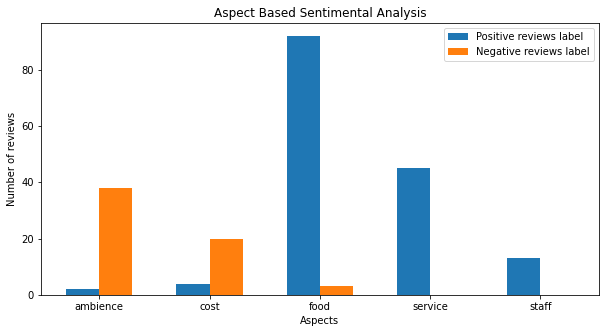

In [32]:
#Finally plotting the graph, where blue bars will indicate the positive reviews and red bars will indicate the negative reviews 
#for the respective counts.

import numpy as np
import matplotlib.pyplot as plt
# Numbers of pairs of bars you want
N = len(new_list)

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = pos_list
# Specify the values of orange bars (height)
orange_bar = neg_list

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Positive reviews label')
plt.bar(ind + width, orange_bar, width, label='Negative reviews label')

plt.xlabel('Aspects')
plt.ylabel('Number of reviews')
plt.title('Aspect Based Sentimental Analysis')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2,new_list)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()